In [1]:
import keras as K
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
model = K.models.load_model('./store/rts_best_weight.h5')

In [9]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(preprocessing_function = K.applications.resnet50.preprocess_input)
test_data = test_datagen.flow_from_directory('./datasets/test',
                                                        target_size=(224, 224),
                                                        batch_size=64,
                                                        class_mode='categorical', shuffle= False)

Found 13350 images belonging to 7 classes.


In [10]:
import numpy as np
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

209/209 [==============================] - 321s 2s/step


In [11]:
classes = ['dry_asphalt_severe',
           'dry_asphalt_smooth',
           'dry_concrete_severe',
           'dry_concrete_smooth',
           'dry_gravel',
           'wet_asphalt_severe',
           'wet_asphalt_smooth']
print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=classes))

Confusion Matrix
[[ 595   61   71   25   29    9   10]
 [  17 1783    3  105    8    2  432]
 [ 337   21 1791  107   77   11    6]
 [   4  207   44 2042    5    0   48]
 [  43  182   39   36 2031    1   18]
 [  64   56   14   27    1  555   83]
 [   2  331    1   31    1    8 1976]]
Classification Report
                     precision    recall  f1-score   support

 dry_asphalt_severe       0.56      0.74      0.64       800
 dry_asphalt_smooth       0.68      0.76      0.71      2350
dry_concrete_severe       0.91      0.76      0.83      2350
dry_concrete_smooth       0.86      0.87      0.86      2350
         dry_gravel       0.94      0.86      0.90      2350
 wet_asphalt_severe       0.95      0.69      0.80       800
 wet_asphalt_smooth       0.77      0.84      0.80      2350

           accuracy                           0.81     13350
          macro avg       0.81      0.79      0.79     13350
       weighted avg       0.82      0.81      0.81     13350



<Axes: >

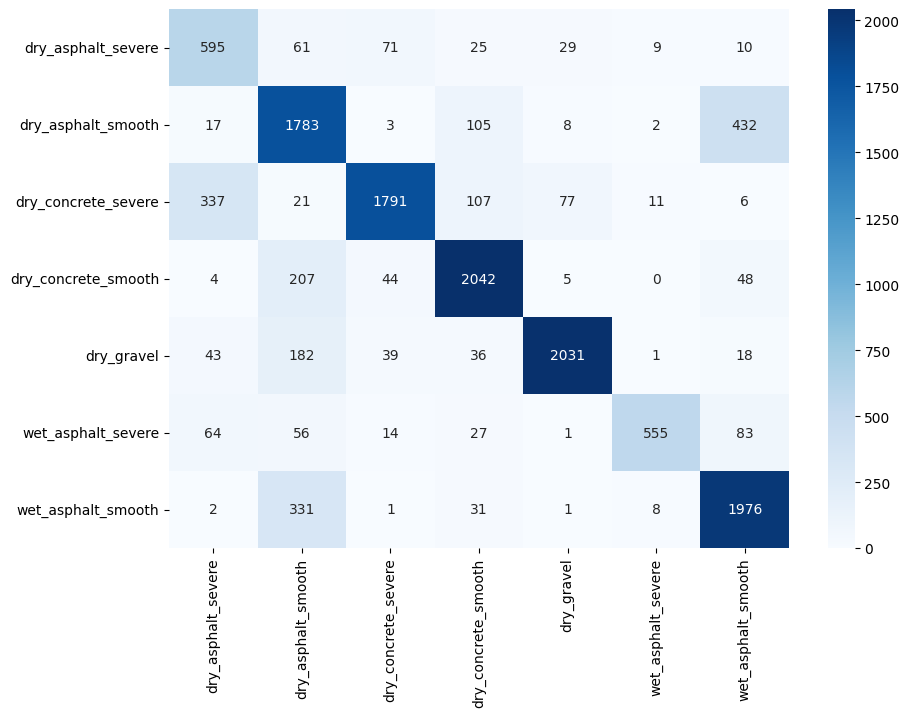

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(confusion_matrix(test_data.classes, y_pred), index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.10g',cmap="Blues")